Analytic solutions are part of the general picture of solving ODEs. Often, we want to compare our numerical solution to an analytic solution to understand the ways in which our solution method falls short (and pitfalls we need to watch out for). You can often do this by hand, but it is also straightforward to use the symbolic manipulation library `sympy` to carry out these solutions. To illustrate, let's walk through the solution of a simple ODE:

$$\frac{dy}{dx} = \frac{1}{2} y,$$

with initial conditions $y(0) = 1$.

## Imports

We need to import `sympy` before we can use it. It is also useful to set up pretty printing, which will make `sympy` output look more like math than code.

In [1]:
import sympy as sp
sp.init_printing()

## Building the equation

Next, we want to build the equation to solve. The basic building block of `sympy` is the `Symbol`. `Symbol`s can be built into `Expr`s (short for expressions) of various kinds: `Sum` (for `Symbol`s added together), `Mul` (for products of `Symbol`s), and so on.

Before we can build our `Expr`, we need to define the `Symbol`s we will use and store them in python variables so that we can access them.

In [40]:
x = sp.symbols('x')
y = sp.Function('y')(x)

Note that we've defined `y` a little differently than `x` here; we want to be sure that `sympy` understands that `y` is a function of `x`. This will be important when we start taking derivatives. In fact, let's do that now. Derivatives are carried out via either `sympy.Derivative()` or `sympy.diff()`, which is a wrapper for `Derivative`.

By default, `diff()` will evaluate derivatives if it can. You can turn this off with `evaluate=False` as a keyword argument.

In [41]:
sp.diff(x**2-3*x, x)

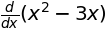

In [42]:
sp.diff(x**2-3*x, x, evaluate=False)

In our case, since we don't have a specific functional form for $y(x)$ yet, `sympy` doesn't know how to evaluate the derivative, so it just leaves it unevaluated.

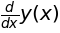

In [43]:
sp.diff(y,x)

There are two main ways to build an equation to solve. The first is to use `sympy.Eq` to create an `Equality` expression.

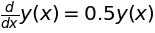

In [44]:
equation = sp.Eq(sp.diff(y, x), 1/2 * y)
equation

The second is to build an expression which is equal to zero. In this case, we could get there by subtracting $0.5y(x)$ from both sides:

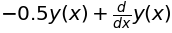

In [45]:
expr = sp.diff(y, x) - 1/2*y
expr

The "=0" part of the equation is implicit, but is understood everywhere it needs to be in `sympy`.

## Solving the equation

Differential equations are solved in `sympy` with `dsolve()`. 

In [46]:
ysol = sp.dsolve(equation, y)
ysol

You get the same result if you solve an expression that is equal to zero or an actual `Equality`.

In [47]:
sp.dsolve(expr)

Note the presence of the constant $C_1$. Constants of this kind represent degrees of freedom in our solution which must be determined by the imposition of boundary (or initial) conditions.

## Applying Boundary/Initial Conditions

In [6]:
ysol.subs(y,1).subs(x,0)

In [7]:
ysol.atoms()

In [8]:
C1 = sp.symbols('C1')

In [9]:
constant = sp.solve(ysol, C1)[0].subs({y:1, x:0})
ysol.subs(C1, constant)

In [10]:
ysol.subs(C1, constant).rhs

## Comparison with numerical solutions

In [11]:
import numpy as np
from scipy.integrate import odeint

In [12]:
def rhs(y, x):
    return 0.5*y

In [13]:
domain = np.linspace(0,1, 100)
y0 = 1
nsol = odeint(rhs, y0, domain)


In [14]:
nsol

array([[ 1.        ],
       [ 1.00506329],
       [ 1.0101522 ],
       [ 1.01526691],
       [ 1.02040748],
       [ 1.02557407],
       [ 1.03076682],
       [ 1.03598589],
       [ 1.04123137],
       [ 1.04650342],
       [ 1.05180216],
       [ 1.05712773],
       [ 1.06248027],
       [ 1.0678599 ],
       [ 1.07326678],
       [ 1.07870103],
       [ 1.0841628 ],
       [ 1.08965222],
       [ 1.09516943],
       [ 1.10071458],
       [ 1.10628781],
       [ 1.11188925],
       [ 1.11751906],
       [ 1.12317737],
       [ 1.12886433],
       [ 1.13458009],
       [ 1.14032478],
       [ 1.14609857],
       [ 1.15190158],
       [ 1.15773399],
       [ 1.16359592],
       [ 1.16948753],
       [ 1.17540897],
       [ 1.1813604 ],
       [ 1.18734196],
       [ 1.1933538 ],
       [ 1.19939609],
       [ 1.20546897],
       [ 1.21157259],
       [ 1.21770713],
       [ 1.22387272],
       [ 1.23006953],
       [ 1.23629772],
       [ 1.24255744],
       [ 1.24884886],
       [ 1

In [15]:
def analytic_1(x):
    return np.exp(x/2)

In [16]:
help(sp.lambdify)

Help on function lambdify in module sympy.utilities.lambdify:

lambdify(args, expr, modules=None, printer=None, use_imps=True, dummify=True)
    Returns a lambda function for fast calculation of numerical values.
    
    If not specified differently by the user, ``modules`` defaults to
    ``["numpy"]`` if NumPy is installed, and ``["math", "mpmath", "sympy"]``
    if it isn't, that is, SymPy functions are replaced as far as possible by
    either ``numpy`` functions if available, and Python's standard library
    ``math``, or ``mpmath`` functions otherwise. To change this behavior, the
    "modules" argument can be used. It accepts:
    
     - the strings "math", "mpmath", "numpy", "numexpr", "sympy", "tensorflow"
     - any modules (e.g. math)
     - dictionaries that map names of sympy functions to arbitrary functions
     - lists that contain a mix of the arguments above, with higher priority
       given to entries appearing first.
    
    .. warning::
        Note that this fu

In [17]:
analytic_2 = sp.lambdify(x, ysol.subs(C1, constant).rhs)

In [18]:
ansol_1 = analytic_1(domain)

In [19]:
ansol_2 = analytic_2(domain)

In [20]:
ansol_1 - ansol_2

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [21]:
residual = ansol_1 - nsol[:,0]
np.sqrt(residual.dot(residual))

## Plotting results

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

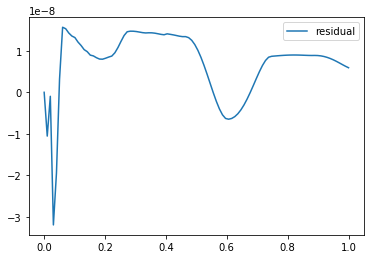

In [23]:
#plt.plot(domain, ansol_1, label="analytic")
#plt.plot(domain, nsol, label="numerical")
plt.plot(domain, residual, label="residual")
plt.legend()

Next one to try:
$$\frac{dy}{dx} = 3x^2 - 2,$$ $0≤ x≤ 1$; initial conditions: $y(0) = 0.5$

In [24]:
x, C1 = sp.symbols('x C1')
y = sp.Function('y')(x)
rhs = 3*x**2 - 2
equation = sp.Eq(sp.diff(y,x), rhs)
ysol = sp.dsolve(equation, y)

In [25]:
ysol

### Apply initial conditions

In [26]:
ysol_with_ic = ysol.subs(C1, sp.solve(ysol.subs({y:0.5, x:0}))[0])
ysol_with_ic